In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


diabetes = pd.read_csv('diabetes.csv')

diabetes.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


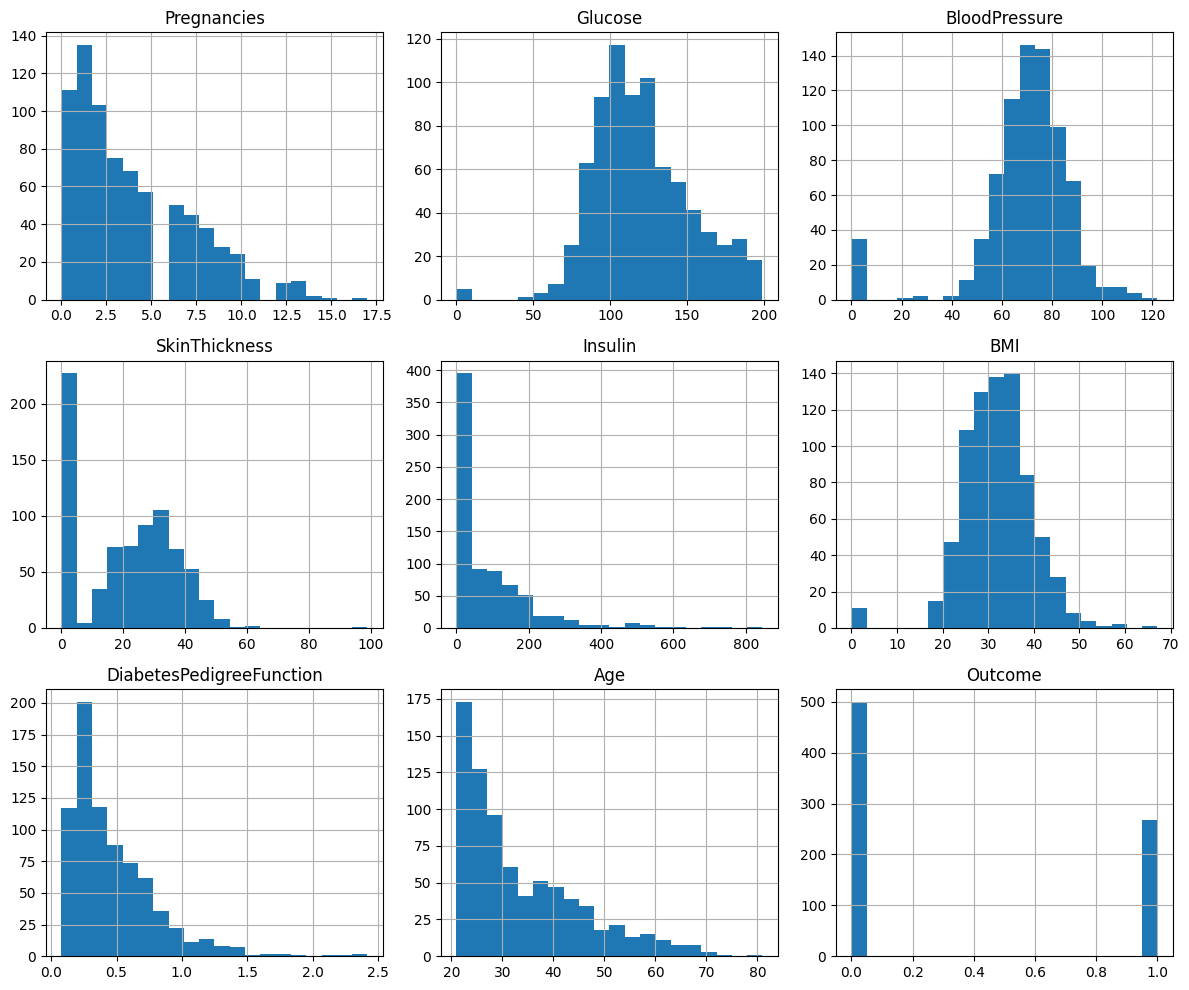

<Figure size 640x480 with 0 Axes>

In [70]:
import matplotlib.pyplot as plt

diabetes.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()
plt.savefig('diabetes_histogram.png')


> Como se puede apreciar en los histogramas, hay datos anomalos en Insulin, SkinThickness, BMI, Glucose y BloodPressure.

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


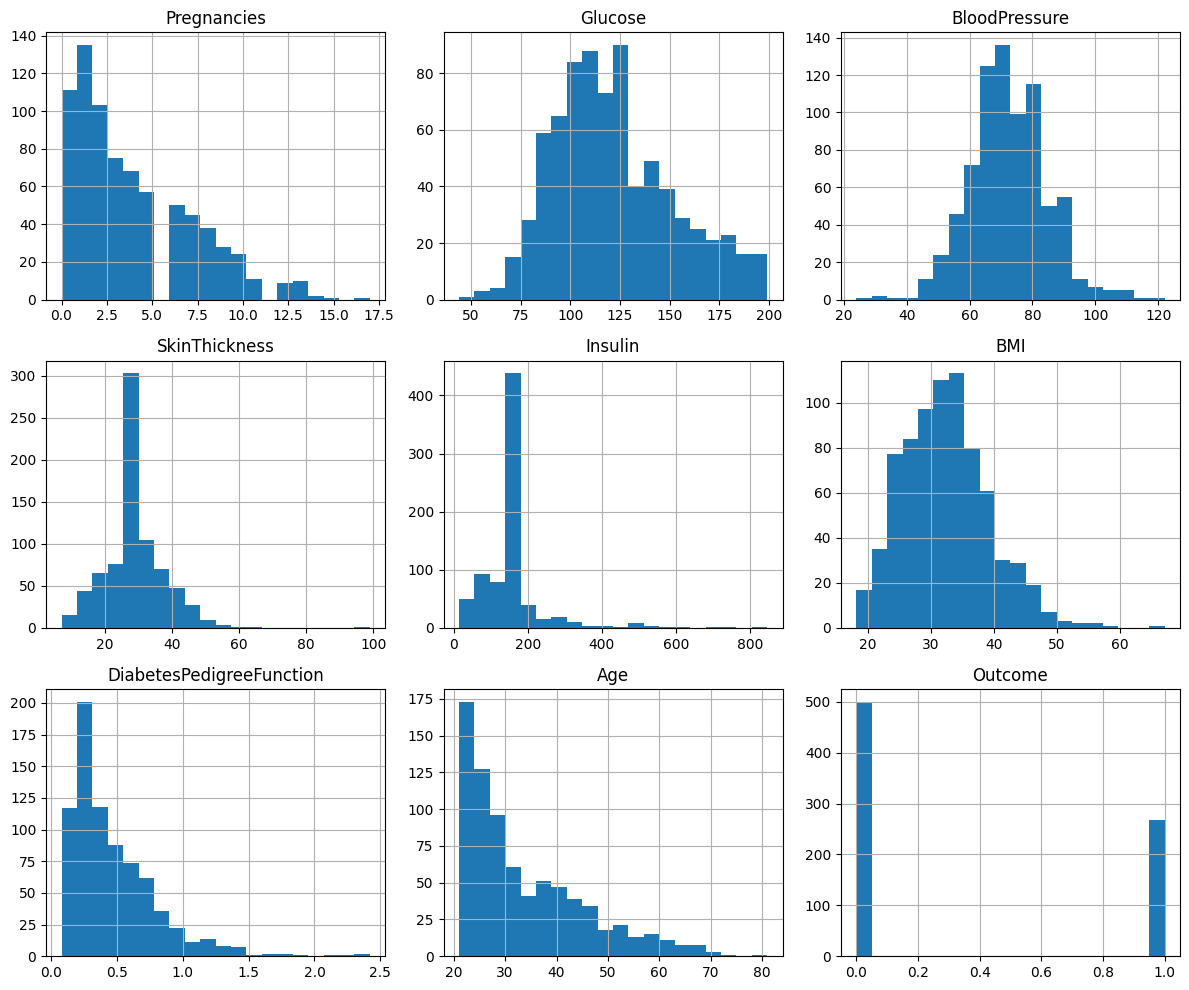

<Figure size 640x480 with 0 Axes>

In [71]:
indicadores_anomalos = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
print((diabetes[indicadores_anomalos] == 0 ).sum() )
diabetes[indicadores_anomalos] = diabetes[indicadores_anomalos].replace(0, np.nan)
diabetes[indicadores_anomalos] = diabetes[indicadores_anomalos].fillna(diabetes[indicadores_anomalos].mean())
diabetes.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()
plt.savefig('diabetes_histogram.png')


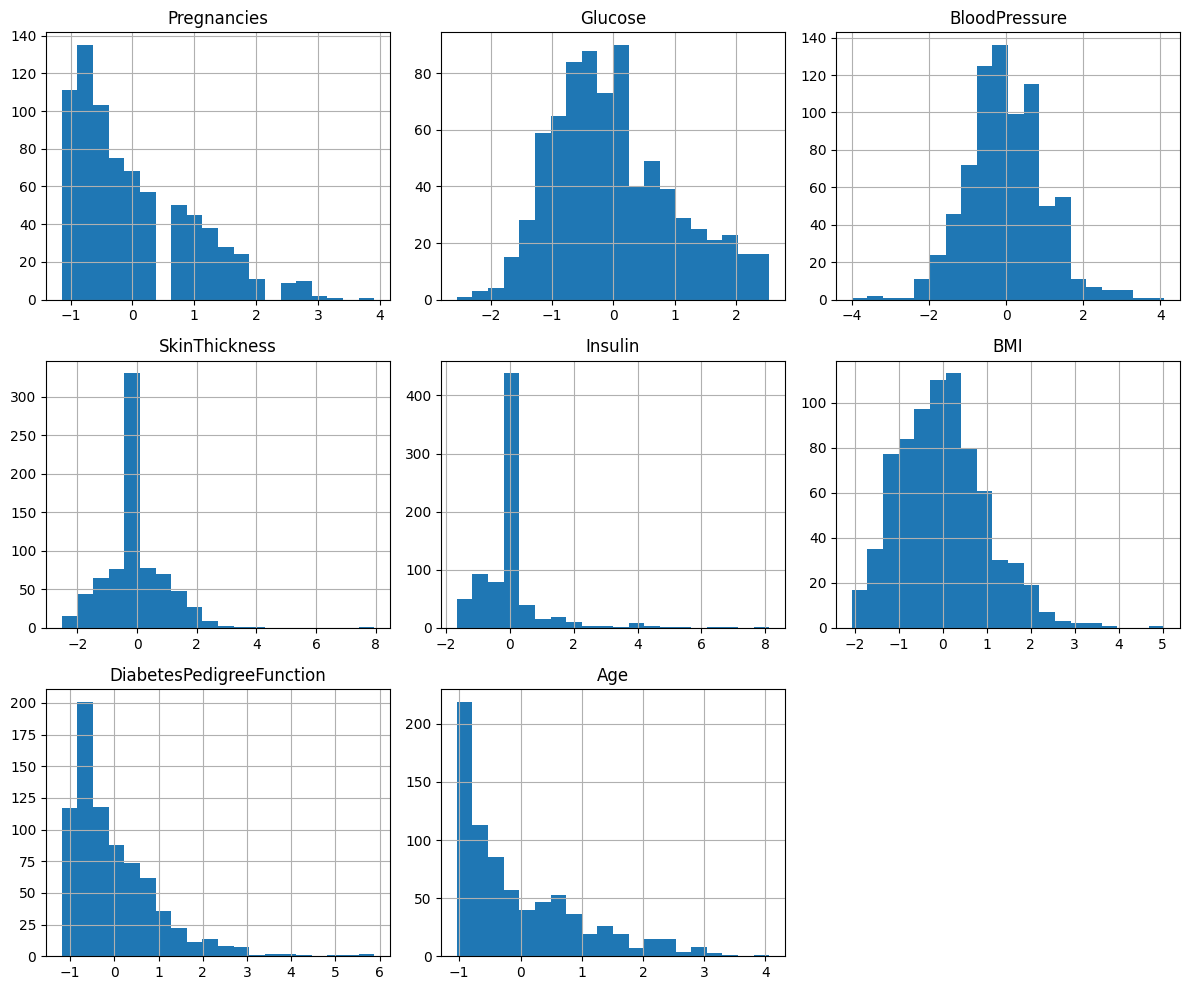

<Figure size 640x480 with 0 Axes>

In [72]:
# Escalado de características numéricas
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
diabetes_scaled = diabetes.copy()

X = diabetes_scaled.drop(columns=['Outcome'])
y = diabetes_scaled['Outcome']

X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Visualización de las características escaladas
X_scaled_df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()
plt.savefig('diabetes_histogram.png')

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer


# División del dataset en train, validación y test
x_train, x_temporal, y_train, y_temporal = train_test_split(X_scaled_df, y, test_size=0.4, random_state=42, stratify=y)
x_validacion, x_test, y_validacion, y_test = train_test_split(x_temporal, y_temporal, test_size=0.5, random_state=42, stratify=y_temporal)

In [78]:

# Entrenamiento del modelo de Regresión Logística
modelo_log = LogisticRegression(max_iter=1000)
modelo_log.fit(x_train, y_train)

# Evaluación en validación
y_pred_val_log = modelo_log.predict(x_validacion)

print("=== Regresión Logística ===")
print("Accuracy:", accuracy_score(y_validacion, y_pred_val_log))
print(classification_report(y_validacion, y_pred_val_log))

=== Regresión Logística ===
Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       100
           1       0.67      0.63      0.65        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



In [79]:
from sklearn.tree import DecisionTreeClassifier

# Entrenamiento del modelo con profundidad limitada
modelo_arbol = DecisionTreeClassifier(max_depth=5, random_state=42)
modelo_arbol.fit(x_train, y_train)

# Evaluación en validación
y_pred_val_arbol = modelo_arbol.predict(x_validacion)

print("=== Árbol de Decisión ===")
print("Accuracy:", accuracy_score(y_validacion, y_pred_val_arbol))
print(classification_report(y_validacion, y_pred_val_arbol))


=== Árbol de Decisión ===
Accuracy: 0.7142857142857143
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       100
           1       0.58      0.67      0.62        54

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.70       154
weighted avg       0.73      0.71      0.72       154



In [80]:
from sklearn.neighbors import KNeighborsClassifier

# Entrenamiento con k=5 (valor comúnmente razonable)
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(x_train, y_train)

# Evaluación en validación
y_pred_val_knn = modelo_knn.predict(x_validacion)

print("=== KNN (k=5) ===")
print("Accuracy:", accuracy_score(y_validacion, y_pred_val_knn))
print(classification_report(y_validacion, y_pred_val_knn))


=== KNN (k=5) ===
Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       100
           1       0.67      0.63      0.65        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154

